In [1]:
# https://datascience.quantecon.org/scientific/optimization.html

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

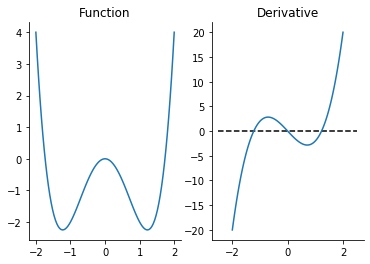

In [3]:
def f(x):
    return x**4 - 3*x**2


def fp(x):
    return 4*x**3 - 6*x

# Create 100 evenly spaced points between -2 and 2
x = np.linspace(-2., 2., 100)

# Evaluate the functions at x values
fx = f(x)
fpx = fp(x)

# Create plot
fig, ax = plt.subplots(1, 2)

ax[0].plot(x, fx)
ax[0].set_title("Function")

ax[1].plot(x, fpx)
ax[1].hlines(0.0, -2.5, 2.5, color="k", linestyle="--")
ax[1].set_title("Derivative")

for _ax in ax:
    _ax.spines["right"].set_visible(False)
    _ax.spines["top"].set_visible(False)

In [5]:
import scipy.optimize as opt

In [6]:
# For a scalar problem, we give it the function and the bounds between
# which we want to search
neg_min = opt.minimize_scalar(f, [-2, -0.5])
pos_min = opt.minimize_scalar(f, [0.5, 2.0])
print("The negative minimum is: \n", neg_min)
print("The positive minimum is: \n", pos_min)

The negative minimum is: 
      fun: -2.2499999999999996
    nfev: 16
     nit: 12
 success: True
       x: -1.2247448697638397
The positive minimum is: 
      fun: -2.2499999999999996
    nfev: 16
     nit: 12
 success: True
       x: 1.2247448697638397


In [7]:
# Create a function that evaluates to negative f
def neg_f(x):
    return -f(x)

max_out = opt.minimize_scalar(neg_f, [-0.35, 0.35])
print("The maximum is: \n", max_out)

The maximum is: 
      fun: 1.1519919564363613e-23
    nfev: 13
     nit: 9
 success: True
       x: 1.9595849530247992e-12


# Consumer Theory

Text(0, 0.5, 'U(B=1.5, A)')

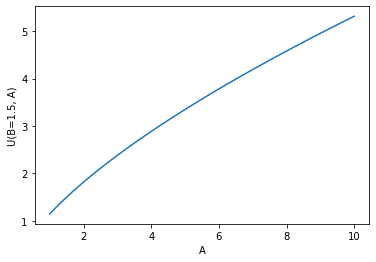

In [8]:
def U(A, B, alpha=1/3):
    return B**alpha * A**(1-alpha)

fig, ax = plt.subplots()
B = 1.5
A = np.linspace(1, 10, 100)
ax.plot(A, U(A, B))
ax.set_xlabel("A")
ax.set_ylabel("U(B=1.5, A)")

Text(0.5, 1.0, 'U(A,B)')

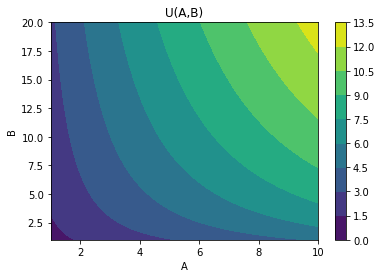

In [9]:
fig, ax = plt.subplots()
B = np.linspace(1, 20, 100).reshape((100, 1))
contours = ax.contourf(A, B.flatten(), U(A, B))
fig.colorbar(contours)
ax.set_xlabel("A")
ax.set_ylabel("B")
ax.set_title("U(A,B)")

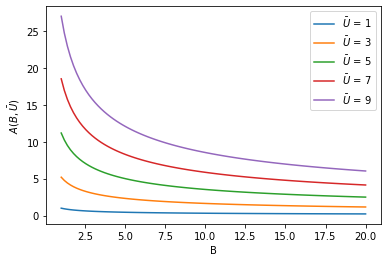

In [10]:
def A_indifference(B, ubar, alpha=1/3):
    return ubar**(1/(1-alpha)) * B**(-alpha/(1-alpha))

def plot_indifference_curves(ax, alpha=1/3):
    ubar = np.arange(1, 11, 2)
    ax.plot(B, A_indifference(B, ubar, alpha))
    ax.legend([r"$\bar{U}$" + " = {}".format(i) for i in ubar])
    ax.set_xlabel("B")
    ax.set_ylabel(r"$A(B, \bar{U}$)")

fig, ax = plt.subplots()
plot_indifference_curves(ax)

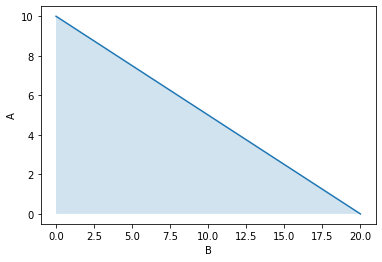

In [11]:
def A_bc(B, W=20, pa=2):
    "Given B, W, and pa return the max amount of A our consumer can afford"
    return (W - B) / pa

def plot_budget_constraint(ax, W=20, pa=2):
    B_bc = np.array([0, W])
    A = A_bc(B_bc, W, pa)
    ax.plot(B_bc, A)
    ax.fill_between(B_bc, 0, A, alpha=0.2)
    ax.set_xlabel("B")
    ax.set_ylabel("A")
    return ax

fig, ax = plt.subplots()
plot_budget_constraint(ax, 20, 2)

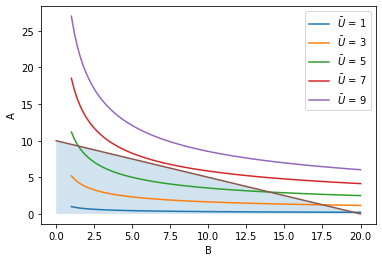

In [12]:
fig, ax = plt.subplots()
plot_indifference_curves(ax)
plot_budget_constraint(ax)

In [13]:
from scipy.optimize import minimize_scalar

def objective(B, W=20, pa=2):
    """
    Return value of -U for a given B, when we consume as much A as possible

    Note that we return -U because scipy wants to minimize functions,
    and the value of B that minimizes -U will maximize U
    """
    A = A_bc(B, W, pa)
    return -U(A, B)

result = minimize_scalar(objective)
optimal_B = result.x
optimal_A = A_bc(optimal_B, 20, 2)
optimal_U = U(optimal_A, optimal_B)

print("The optimal U is ", optimal_U)
print("and was found at (A,B) =", (optimal_A, optimal_B))

The optimal U is  6.666666666666667
and was found at (A,B) = (6.666666630651958, 6.666666738696083)


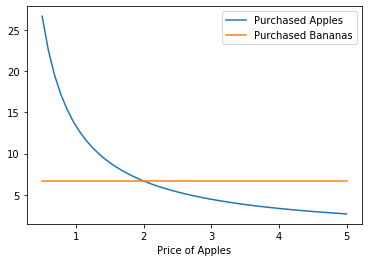

In [14]:
# Create various prices
n_pa = 50
prices_A = np.linspace(0.5, 5.0, n_pa)
W = 20

# Create lists to store the results of the optimal A and B calculation
optimal_As = []
optimal_Bs = []
for pa in prices_A:
    result = minimize_scalar(objective, args=(W, pa))
    opt_B_val = result.x

    optimal_Bs.append(opt_B_val)
    optimal_As.append(A_bc(opt_B_val, W, pa))

fig, ax = plt.subplots()

ax.plot(prices_A, optimal_As, label="Purchased Apples")
ax.plot(prices_A, optimal_Bs, label="Purchased Bananas")
ax.set_xlabel("Price of Apples")
ax.legend()